<a href="https://colab.research.google.com/github/salmanhiro/MALT90-Clumps-Classification-Deep-Learning/blob/main/Albumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/malt90

/content/drive/MyDrive/malt90


In [ ]:
!pip install -U albumentations
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [ ]:
import albumentations as A
import cv2

transform = A.Compose([
    A.RandomCrop(width=600, height=600),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.SafeRotate(limit=45),
    A.RGBShift(r_shift_limit=10),
    A.RandomBrightnessContrast(p=0.2),
])

(-0.5, 709.5, 684.5, -0.5)

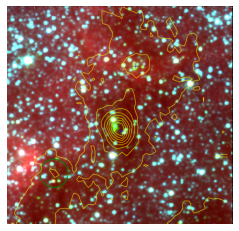

In [ ]:
import matplotlib.pyplot as plt

image = cv2.imread("Gim_ml_split_Gim/train/A/AG0031_Gim.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image[15:700,110:-10]
plt.figure()
plt.imshow(image)
plt.axis("off")

In [ ]:
img_list = []

for i in range(5):
  transformed = transform(image=image)
  transformed_image = transformed["image"]
  img_list.append(transformed_image)


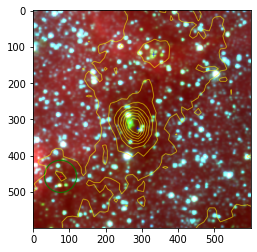

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_list[4])

In [ ]:
!mkdir Gim_ml_split_Gim/train_augmented

In [ ]:
import os

subset = "test"
dest = "test_crop"
#classes = os.listdir(f"/content/drive/MyDrive/malt90/Gim_ml_split_Gim/{subset}")
classes = ['A', 'P', 'Q', 'H', 'C']
for class_img in classes:
  os.makedirs(f"/content/drive/MyDrive/malt90/Gim_ml_split_Gim/{dest}/{class_img}", exist_ok=True)
  imgs = os.listdir(f"/content/drive/MyDrive/malt90/Gim_ml_split_Gim/{subset}/{class_img}")
  count = 0
  print(len(imgs))
  for img in imgs:
    
    try:
        imagename = f"/content/drive/MyDrive/malt90/Gim_ml_split_Gim/{subset}/{class_img}/{img}"
        image = cv2.imread(imagename)
        image = image[15:700,110:-10]
        
        cv2.imwrite(f"/content/drive/MyDrive/malt90/Gim_ml_split_Gim/{dest}/{class_img}/{img}", image)
        #if 700//len(imgs) > 1:
        #  for i in range(700//len(imgs)):
        #   
        #    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #    transformed = transform(image=image)
        #    transformed_image = transformed["image"]
        #    #transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)
        #    cv2.imwrite(f"/content/drive/MyDrive/malt90/Gim_ml_split_Gim/{dest}/{class_img}/{i}_{img}", transformed_image)
        #  print(f"{imagename} finished")
        #  count += 1
        #  print(f"{count}/{len(imgs)}")
    except ValueError:
      pass



80
37
70
76
20


In [ ]:
classes

['A', 'P', 'Q', 'H', 'U', 'C']